# CIFAR-10 DATASET - CNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 32s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train[0].shape

(32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

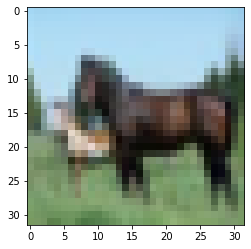

In [12]:
plt.imshow(X_train[12])

In [13]:
X_train[0].max()

255

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

## Model Creation and training

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [31]:
model = Sequential()

# Convolution layer-1
model.add(Conv2D(filters=32,kernel_size=(4,4),
          input_shape=(32,32,3),
          activation = 'relu'))

# Pooling layer-1
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution layer-2
model.add(Conv2D(filters=32,kernel_size=(4,4),
          input_shape=(32,32,3),
          activation = 'relu'))

# Pooling layer-2
model.add(MaxPool2D(pool_size=(2,2)))

# Flattening layer
model.add(Flatten())

# Dense layer
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 5,
                           mode='min')

In [35]:
model.fit(x = X_train,
          y = y_cat_train,
          epochs=20,
          callbacks = [early_stop],
          validation_data = (X_test, y_cat_test))

Epoch 1/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4843 - accuracy: 0.4645 - val_loss: 1.2492 - val_accuracy: 0.5529
Epoch 2/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1731 - accuracy: 0.5851 - val_loss: 1.1361 - val_accuracy: 0.6008
Epoch 3/20
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0424 - accuracy: 0.6326 - val_loss: 1.0782 - val_accuracy: 0.6259
Epoch 4/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9487 - accuracy: 0.6690 - val_loss: 1.0077 - val_accuracy: 0.6508
Epoch 5/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8770 - accuracy: 0.6920 - val_loss: 0.9507 - val_accuracy: 0.6668
Epoch 6/20
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8117 - accuracy: 0.7143 - val_loss: 0.9685 - val_accuracy: 0.6666
Epoch 7/20
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7529 - accuracy: 0.7367 - val_loss: 0.9454 -

In [36]:
metrics = pd.DataFrame(model.history.history)

In [37]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.484329,0.46454,1.249208,0.5529
1,1.173119,0.58512,1.136080,0.6008
2,1.042376,0.63256,1.078200,0.6259
3,0.948715,0.66904,1.007732,0.6508
4,0.877001,0.69204,0.950664,0.6668
5,0.811724,0.71434,0.968546,0.6666
6,0.752877,0.73670,0.945406,0.6741
7,0.704256,0.75336,0.916507,0.6841
8,0.663091,0.76484,0.974317,0.6744
9,0.618485,0.78106,0.965106,0.6845


In [38]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

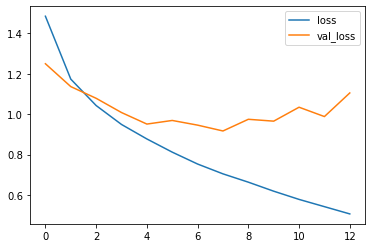

In [39]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

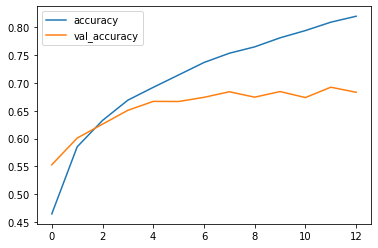

In [41]:
metrics[['accuracy', 'val_accuracy']].plot()

In [42]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1000
           1       0.76      0.82      0.79      1000
           2       0.60      0.59      0.59      1000
           3       0.49      0.52      0.50      1000
           4       0.67      0.62      0.64      1000
           5       0.66      0.50      0.57      1000
           6       0.79      0.74      0.77      1000
           7       0.76      0.70      0.73      1000
           8       0.71      0.84      0.77      1000
           9       0.69      0.76      0.72      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [47]:
print(confusion_matrix(y_test, predictions))

[[739  30  45  12  10  10   6  11  86  51]
 [ 20 817   5   3   3   1   8   2  34 107]
 [ 81  15 586  67  79  37  47  26  37  25]
 [ 26  26  72 522  60 123  56  36  42  37]
 [ 30   8  80  75 619  31  40  71  30  16]
 [ 17  10  67 235  48 497  23  57  27  19]
 [  8  22  59  69  44  10 744   6  22  16]
 [ 27   7  44  62  58  40   7 702  13  40]
 [ 57  39   6  11   3   5   2   2 844  31]
 [ 40  96  10  15   2   4   7   9  55 762]]


<AxesSubplot:>

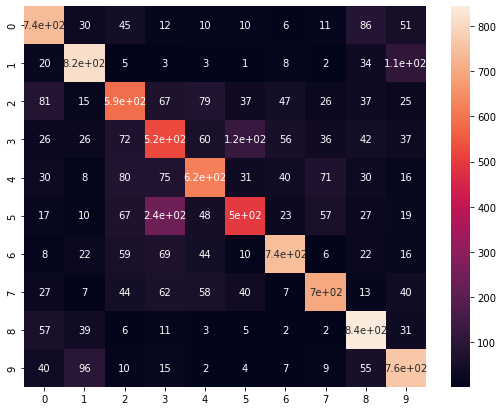

In [48]:
plt.figure(figsize = (9,7))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

In [71]:
n = 16
my_img = X_test[n]

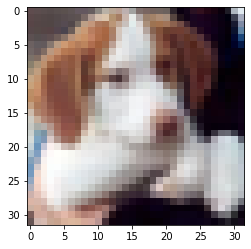

In [72]:
plt.imshow(my_img)

In [73]:
model.predict_classes(my_img.reshape(1,32,32,3))

array([5], dtype=int64)

In [74]:
y_test[n]

array([5], dtype=uint8)

## The End